In [35]:
import pandas as pd
import numpy as np
import statistics as st
file=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [22]:
def data_clean(f):
    if f.columns.isin(['Unnamed: 0']).sum()!=0:
        f=f.drop('Unnamed: 0', axis=1)
    cname=f.columns
    for x in cname:
        if f[x].isna().sum()!=0:
            if f[x].dtype=='object':
                # fills NaNs of the object.list with the mode of the list 
                f[x]=f[x].fillna(st.mode(f[x]))
            
            else:
                # fills NaNs of the number.list with mean of the list 
                f[x]=f[x].fillna(np.mean(f[x]))
                
                f[f[x].isna()==True][x]=[f[x].mean()]*f[x].isna().sum()

    return f

In [23]:
file=data_clean(file)
file.columns=[x.lower().replace(' ','_') for x in file.columns]
file.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

Vehicle Type has more NaNs as entrys. The rest Entries only have the value A. 
=>Vehicle Type column can be droped

In [24]:
file=file.drop(['vehicle_type'], axis=1)

Customer is a random generated code and is for every entry different.

In [25]:
file=file.drop(['customer'], axis=1)

Policy Type is a summarized version of Policy=> can be droped

In [26]:
file=file.drop(['policy_type'], axis=1)

Transform Effective to Date into a number

In [27]:
file.effective_to_date=pd.to_datetime(file['effective_to_date'], errors='coerce').astype(np.int64)
file.to_csv('csv_files/marketing_customer_analysis2.csv',index=False)

C:\Users\lahrm\AppData\Local\Temp/ipykernel_15160/2866084600.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  file.effective_to_date=pd.to_datetime(file['effective_to_date'], errors='coerce').astype(np.int64)


In [28]:
numerics=file.select_dtypes(include = np.number)
charactoricals=file.select_dtypes(include = object)


Plot dispersion

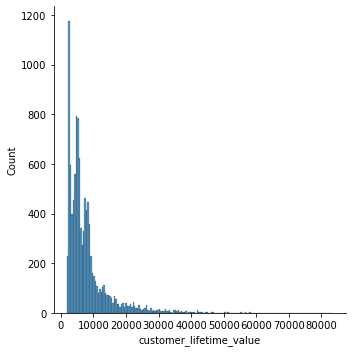

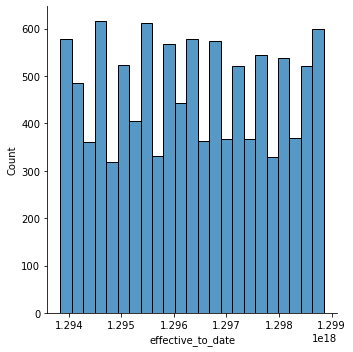

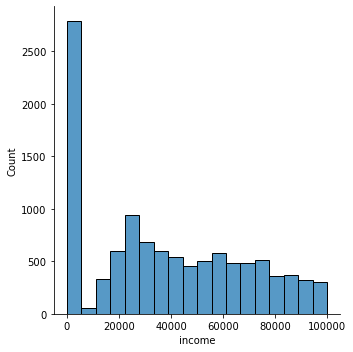

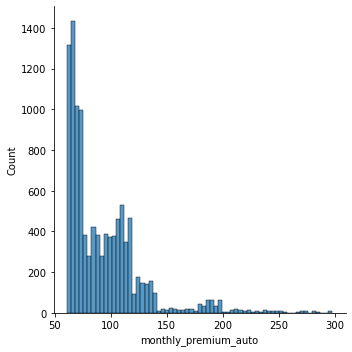

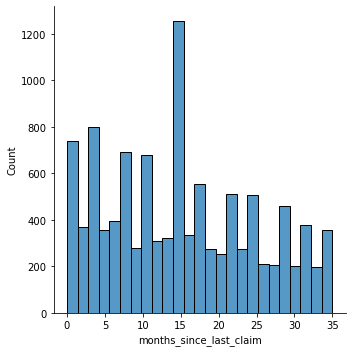

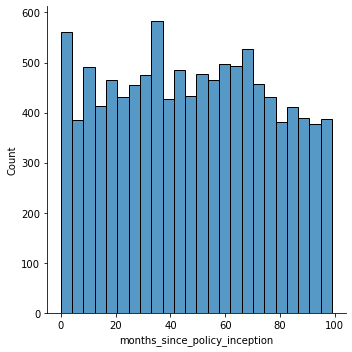

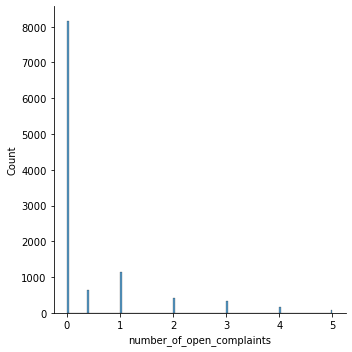

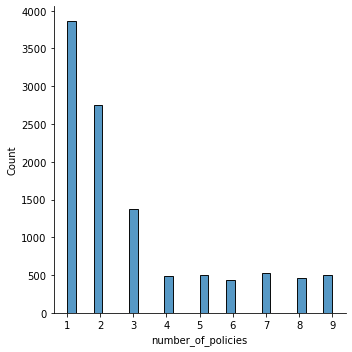

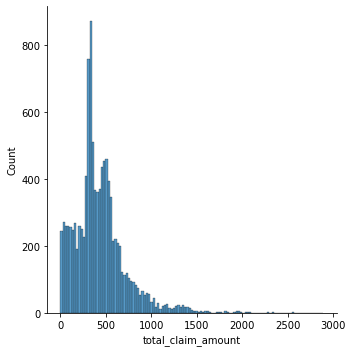

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

c=numerics.columns
for x in c:
    sns.displot(numerics[x])
    plt.show()

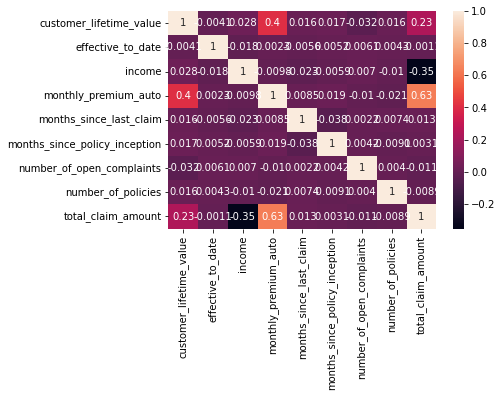

In [30]:
correlations_matrix = numerics.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [31]:
y=numerics.total_claim_amount
X_nums=numerics.drop(['total_claim_amount'], axis=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
transformer1 = MinMaxScaler().fit(X_nums)
X_norm = transformer1.transform(X_nums)
X_norm=pd.DataFrame(X_norm, columns=X_nums.columns)

In [33]:
from sklearn.preprocessing import StandardScaler
transformer2 = StandardScaler().fit(X_nums)
X_stan = transformer2.transform(X_nums)
X_stan=pd.DataFrame(X_stan, columns=X_nums.columns)

In [39]:
#from solution of Erin
X_cat=pd.get_dummies(charactoricals, drop_first=True)  

Try different fit models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [42]:
#standardized full model
X1=pd.concat([X_stan,X_cat],axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=42)
lm1 = linear_model.LinearRegression().fit(X1_train,y_train)
predictions = lm1.predict(X1_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print('r2:',r2,'mse:',mse,'rmse:',mse**0.5,'mae:',mae)

r2: 0.7691436233177884 mse: 18640.030629529327 rmse: 136.5284974997137 mae: 95.26174252240803


In [45]:
#normalized full model
X2=pd.concat([X_norm,X_cat],axis=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2,random_state=42)
lm2 = linear_model.LinearRegression().fit(X2_train,y_train)
predictions = lm2.predict(X2_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print('r2:',r2,'mse:',mse,'rmse:',mse**0.5,'mae:',mae)

r2: 0.7691436233177884 mse: 18640.030629529327 rmse: 136.5284974997137 mae: 95.26174252240811


In [46]:
#normalized model without character imput
X3=X_norm
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2,random_state=42)
lm3 = linear_model.LinearRegression().fit(X3_train,y_train)
predictions = lm3.predict(X3_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print('r2:',r2,'mse:',mse,'rmse:',mse**0.5,'mae:',mae)

r2: 0.5070564415054055 mse: 39801.729374003604 rmse: 199.50370766981652 mae: 144.83791834858533


In [52]:
#normalized reduced model 
X4=X_norm[['customer_lifetime_value','income','monthly_premium_auto']]
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2,random_state=42)
lm4 = linear_model.LinearRegression().fit(X4_train,y_train)
predictions = lm4.predict(X4_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print('r2:',r2,'mse:',mse,'rmse:',mse**0.5,'mae:',mae)

r2: 0.5076661783468523 mse: 39752.497407514915 rmse: 199.38028339711758 mae: 144.7632222428603


In [53]:
#normalized reduced model including character
X5=pd.concat([X4,X_cat],axis=1)
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2,random_state=42)
lm5 = linear_model.LinearRegression().fit(X5_train,y_train)
predictions = lm5.predict(X5_test)
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print('r2:',r2,'mse:',mse,'rmse:',mse**0.5,'mae:',mae)

r2: 0.7691018104998975 mse: 18643.406720835075 rmse: 136.54086099345892 mae: 95.39660302784472
